In [44]:
import pandas as pd

In [45]:
# Read in the Excel  to get the Sheet Names
xlsx_file_nm = './input_data/WB_phenotypes_AKW_DPH-1.xlsx'
phenotypes_xlsx = pd.ExcelFile(xlsx_file_nm)
sheet_names = phenotypes_xlsx.sheet_names
sheet_names

['WB_phenotypes',
 'deduped',
 'clean',
 'clean_del_phen',
 'Incomplete Sorting',
 'Barcode concept',
 'Possible additional categories',
 'One-Hot',
 'One-Hot_named',
 'phenotype_slim',
 'WB_phenotypes_slim']

In [46]:
wb_phenotypes_df = pd.read_excel(xlsx_file_nm, sheet_name='WB_phenotypes')
wb_phenotypes_df = wb_phenotypes_df.fillna('nan')
print(len(wb_phenotypes_df))
unique_values = wb_phenotypes_df['phenotype_label'].unique()
print(len(unique_values))

128906
2137


In [47]:
# for each gene in wb_phenotypes_df
# create a dict wb_id_dict that conatains all the phenotyeps for the gene (wb_ids)
# create a dict phenotype_dict that contains all the genes (wb_ids) that have this phenetype

phenotype_dict = {}
wb_id_dict = {}
for index, row in wb_phenotypes_df.iterrows():
    if row.wormbase_id not in wb_id_dict:
        wb_id_dict[row.wormbase_id] = [row.phenotype_label]
    else:
        if row.phenotype_label not in wb_id_dict[row.wormbase_id]:
            wb_id_dict[row.wormbase_id].append(row.phenotype_label)
            
    if row.phenotype_label not in phenotype_dict:
        phenotype_dict[row.phenotype_label] = [row.wormbase_id]
    else:
        if row.wormbase_id not in phenotype_dict[row.phenotype_label]:
            phenotype_dict[row.phenotype_label].append(row.wormbase_id)
    
#phenotype_dict

In [85]:
#Go throught the phenotype list
#Find the phenotye 
two_category = {}
for source_phenotype in phenotype_dict:
    for wormbase_id in phenotype_dict[source_phenotype]:
        for target_phenotype in wb_id_dict[wormbase_id]:
            if source_phenotype != target_phenotype:
                key_list = sorted([source_phenotype, target_phenotype])
                key = '_'.join(key_list)
                if key not in two_category:
                    two_category[key] = [wormbase_id]
                else:
                    if wormbase_id not in two_category[key]:
                        two_category[key].append(wormbase_id)
#two_category


In [ ]:
def remove_category_keys(list1, list2):
    return [item for item in list2 if item not in list1]

three_category = {}
for index, key in enumerate(two_category.keys()):
    if index > 10: break
    phenotype_categories = key.split('_')
    if len(phenotype_categories) == 2:
        # Should always equal two
        for wormbase_id in two_category[key]:
            phenotypes_for_wb_id = wb_id_dict[wormbase_id]
            phenotypes_for_wb_id = remove_category_keys(phenotype_categories, phenotypes_for_wb_id)
            for phenotype in phenotypes_for_wb_id:
                key_list = sorted([phenotype_categories[0], phenotype_categories[1], phenotype])
                key = '_'.join(key_list)
                if key not in three_category:
                    three_category[key] = [wormbase_id]
                else:
                     if wormbase_id not in three_category[key]:
                        three_category[key].append(wormbase_id)
                    
#three_category

In [91]:
#combined_dict = dict(phenotype_dict)
#combined_dict.update(two_category)

combined_dict = three_category
category_strength={}
for category in combined_dict:
    category_strength[category]=len(combined_dict[category])

for key in ['nan','nan_nan']:
    if key in category_strength:
        del category_strength[key]
    
sorted_dict = dict(sorted(category_strength.items(), key=lambda x: x[1], reverse=True))  
#sorted_dict

In [92]:
# Extract keys and values of the top 3 items
top_keys = list(sorted_dict.keys())[:25]
top_values = list(sorted_dict.values())[:25]
#top_keys
#top_values

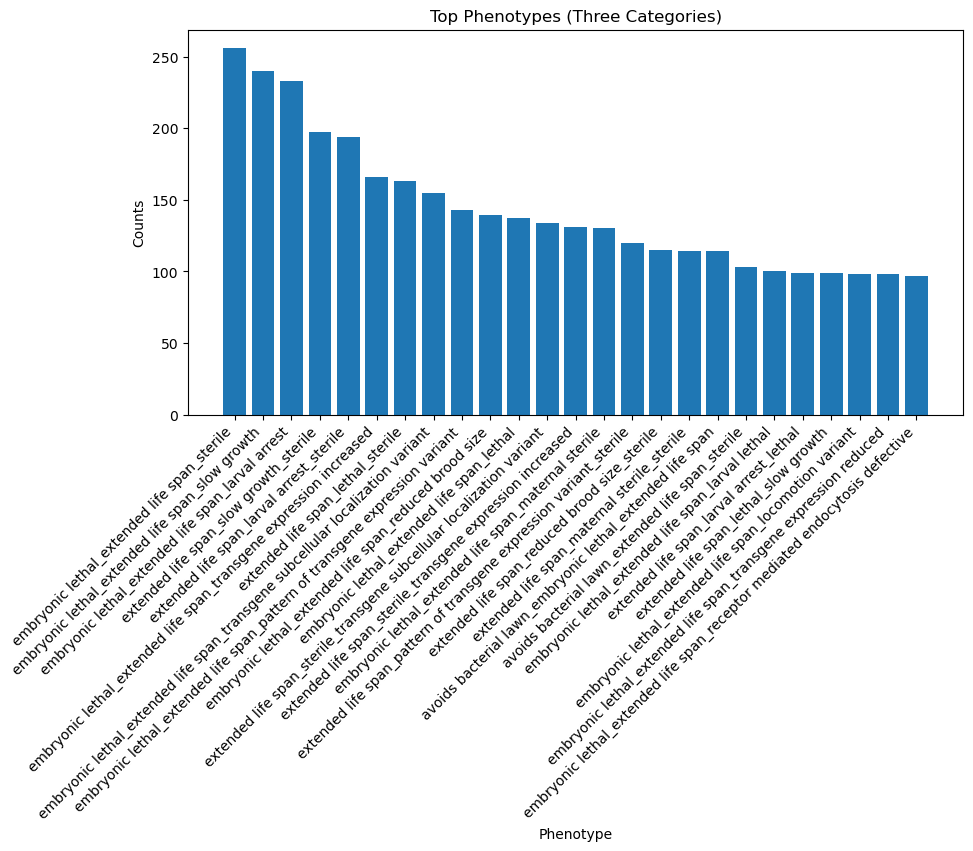

In [94]:
import matplotlib.pyplot as plt


# Extract keys and values of the top 3 items
top_keys = list(sorted_dict.keys())[:25]
top_values = list(sorted_dict.values())[:25]

# Plot the bar chart for the top 3 values
plt.figure(figsize=(10, 5))
plt.bar(top_keys, top_values)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Phenotype')
plt.ylabel('Counts')
plt.title('Top Phenotypes (Three Categories)')

# Show the plot
plt.show()
